In [37]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import torch
from torch import nn
from torch.autograd import Variable

from PIL import Image

from glob import glob

In [33]:
# !rm -r mnist
!unzip mnist.zip

Archive:  mnist.zip
replace mnist/test/0/10.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [51]:
train_files = glob('./mnist/train/*/*.png')
valid_files = glob('./mnist/valid/*/*.png')
test_files = glob('./mnist/test/*/*.png')


list

In [70]:

def set_sizes(percent_train, percent_valid, percent_test, condition=1):
  N_train, N_valid, N_test = int(n_train_files*percent_train/100), int(n_valid_files*percent_valid/100), int(n_test_files*percent_test/100)
  new_train_files, new_valid_files, new_test_files = train_files[:N_train].copy(), valid_files[:N_valid].copy(), test_files[:N_test].copy()
  np.random.shuffle(new_train_files), np.random.shuffle(new_valid_files), np.random.shuffle(new_test_files)
  X_train, X_valid, X_test = [], [], []
  Y_train, Y_valid, Y_test = [], [], []

  for i, train_file in enumerate(new_train_files):
    Y_train.append( int(train_file.split('/')[3]) )
    X_train.append(np.array(Image.open(train_file)))
  for i, valid_file in enumerate(new_valid_files):
    Y_valid.append( int(valid_file.split('/')[3]) )
    X_valid.append(np.array(Image.open(valid_file)))
  for i, test_file in enumerate(new_test_files):
    Y_test.append( int(test_file.split('/')[3]) )
    X_test.append(np.array(Image.open(test_file)))
  X_train = Variable(torch.from_numpy(np.array(X_train))).float()
  Y_train = Variable(torch.from_numpy(np.array(Y_train))).long()

  X_valid = Variable(torch.from_numpy(np.array(X_valid))).float()
  Y_valid = Variable(torch.from_numpy(np.array(Y_valid))).long()

  X_test = Variable(torch.from_numpy(np.array(X_test))).float()
  Y_test = Variable(torch.from_numpy(np.array(Y_test))).long()

  input_dim = 28*28
  out_dim = 10
  hidden = 500

  model = torch.nn.Sequential(
    torch.nn.Linear(input_dim, hidden),
    torch.nn.ReLU(),       
    torch.nn.Linear(hidden, hidden),
    torch.nn.ReLU(),  
    torch.nn.Linear(hidden, out_dim)
  )

  optimizer = torch.optim.Adam(model.parameters())
  criterion = torch.nn.CrossEntropyLoss()

  n_epoch = 100

  loss_train = []
  f1_train = []
  acc_train = []

  loss_valid = []
  f1_valid = []
  acc_valid = []
  for epoch in range(n_epoch):
    model.train()
    
    Xtr = X_train.view(X_train.size(0), -1)
    Y_pred = model(Xtr)

    loss = criterion(Y_pred,Y_train)
    loss_train.append(loss.item())

    Y_pred = torch.argmax(Y_pred, 1)
    f1_train.append( f1_score(Y_train,Y_pred, average='macro') )
    
    acc = sum(Y_train == Y_pred)/len(Y_pred)
    acc_train.append(acc)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model.eval()
    if condition:
      Xvl = X_valid.view(X_valid.size(0), -1)
      Y_pred = model(Xvl)  
      loss = criterion(Y_pred,Y_valid)
      loss_valid.append(loss.item())

      Y_pred = torch.argmax(Y_pred, 1)
      f1_valid.append( f1_score(Y_valid, Y_pred, average='macro') )

      acc = sum(Y_valid == Y_pred)/len(Y_pred)
      acc_valid.append(acc)
    else:
      Xts = X_test.view(X_test.size(0), -1)
      Y_pred = model(Xts)  
      loss = criterion(Y_pred,Y_test)
      loss_valid.append(loss.item())

      Y_pred = torch.argmax(Y_pred, 1)
      f1_valid.append( f1_score(Y_test, Y_pred, average='macro') )

      acc = sum(Y_test == Y_pred)/len(Y_pred)
      acc_valid.append(acc)

  print( 'Epoch [{}/{}], loss: {}. f1:{} acc: {} '.format(epoch+1,n_epoch,loss_train[-1], f1_train[-1], acc_train[-1]) )
  if condition:
    name_evaluation_set='valid'
  else:
    name_evaluation_set='test'
  fig = plt.figure(figsize=(15,5))
  plt.subplot(1,3,1)
  plt.plot(range(n_epoch), loss_train, label='train')
  plt.plot(range(n_epoch), loss_valid, label=name_evaluation_set)
  plt.xlabel('n_epoch')
  plt.ylabel('loss')
  plt.legend()
  plt.grid()
  plt.subplot(1,3,2)
  plt.plot(range(n_epoch), f1_train, label='train')
  plt.plot(range(n_epoch), f1_valid, label=name_evaluation_set)
  plt.xlabel('n_epoch')
  plt.ylabel('f1_score')
  plt.legend()
  plt.grid()
  plt.subplot(1,3,3)
  plt.plot(range(n_epoch), acc_train, label='train')
  plt.plot(range(n_epoch), acc_valid, label=name_evaluation_set)
  plt.xlabel('n_epoch')
  plt.ylabel('accuracy')
  plt.legend()
  plt.grid()

  plt.show()

#Prueba para los sets de entrenamiento y validación usando diferentes tamaños del set de entrenamiento (10%, 20%, 50%, 80% y 100%) 

#**10%**



Epoch [100/100], loss: 0.0. f1:1.0 acc: 1.0 


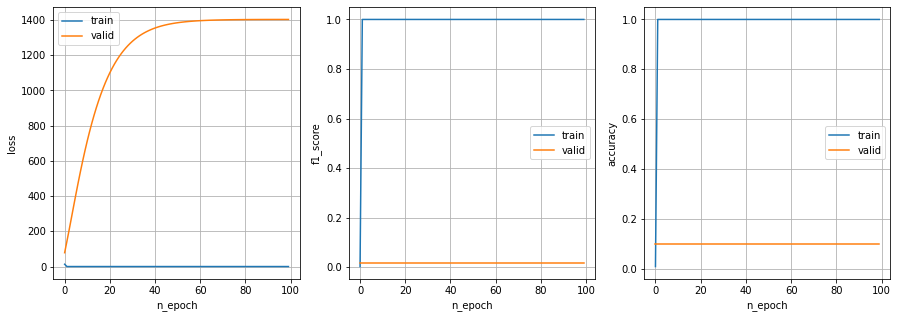

In [71]:
set_sizes(10, 100, 100)

#**20%**

Epoch [100/100], loss: 3.973641971022346e-10. f1:1.0 acc: 1.0 


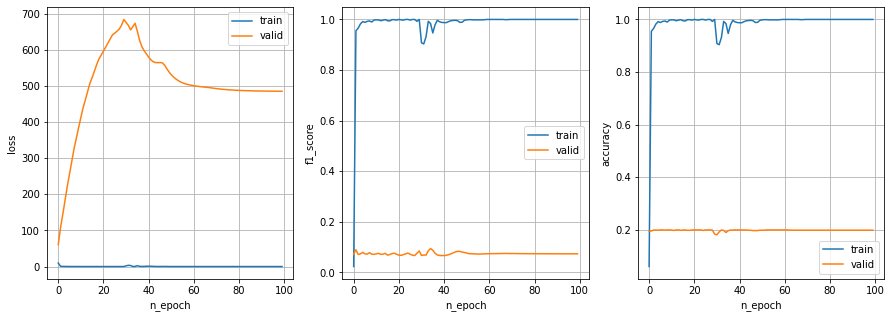

In [72]:
set_sizes(20, 100, 100)

#**50%**

Epoch [100/100], loss: 0.00033114809775725007. f1:1.0 acc: 1.0 


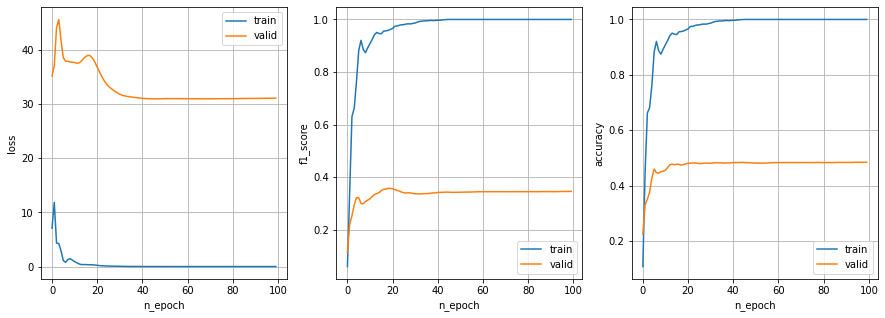

In [73]:
set_sizes(50, 100, 100)

#**80%**

Epoch [100/100], loss: 0.0027374911587685347. f1:1.0 acc: 1.0 


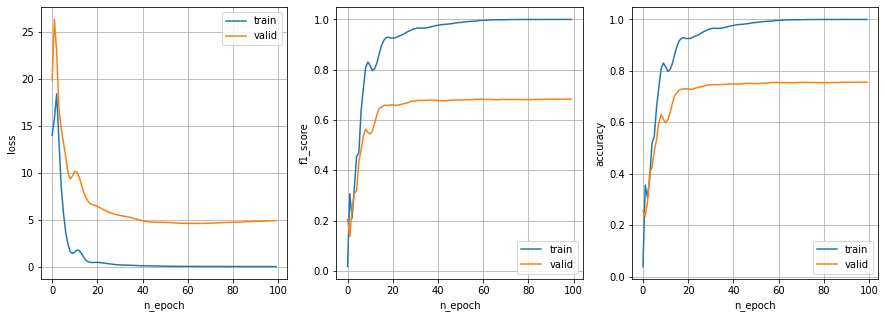

In [74]:
set_sizes(80, 100, 100)

#**100%**

Epoch [100/100], loss: 0.005357110407203436. f1:1.0 acc: 1.0 


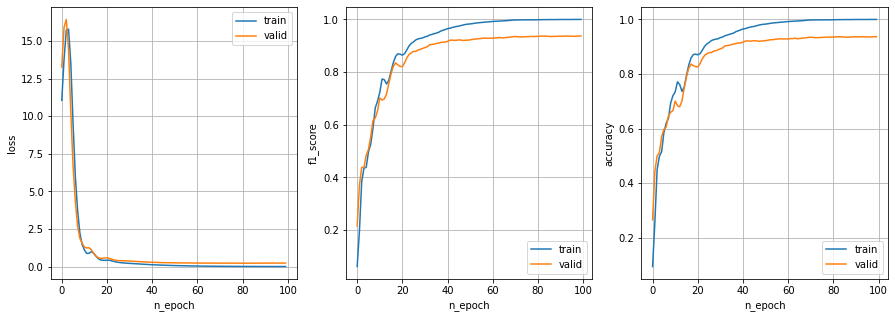

In [75]:
set_sizes(100, 100, 100)

##En conclusion:
El tamaño del set de entrenamiento es importante porque segun sea la mayor cantidad de datos procesados por el modelo este quedara mejor entrenada (capaz de realizar predicciones correctas)
Esto se evidencia al comparar las curvas
Para el score loss vemos una notoria mejora para la curva valid a medida que aumenta el porcentaje de los datos usados para de entrenamiento.
Para el score f1 vemos un aumento a medida que se utiliza un mayor porcentaje de los datos de entrenamiento.
Para el score accuracy vemos algo semejanta a lo que ocurre para el score f1.
A partir de estos resultados, inferimos que el modelo va adquiriendo la "habilidad" de hacer predicciones sobre los datos de entrenamiento y a medida que estos datos son más diversos y variados puede extrapolar mejor lo adquirido del set de entrenamiento para realizar prediciones sobre el set de validacion. (aprende muchos más pratrones por la cual mejora el criterio)


#Prueba usando diferentes tamaños del conjunto de testeo para evaluar (10%, 20%, 50%, 80% y 100%) 

##**10%**

Epoch [100/100], loss: 0.007549252361059189. f1:1.0 acc: 1.0 


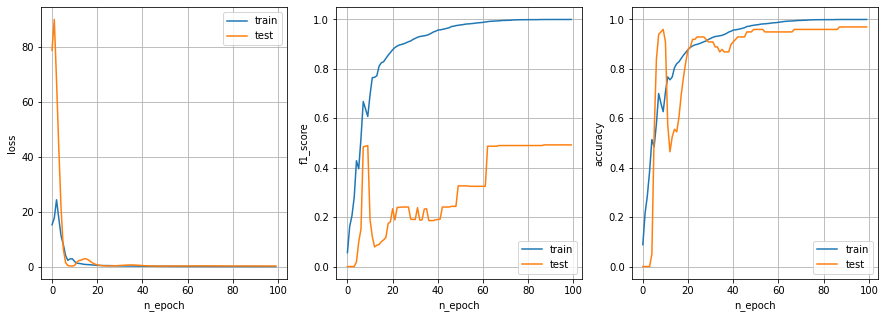

In [81]:
set_sizes(100, 100, 10, 0)

##**20%**

Epoch [100/100], loss: 0.006948060356080532. f1:1.0 acc: 1.0 


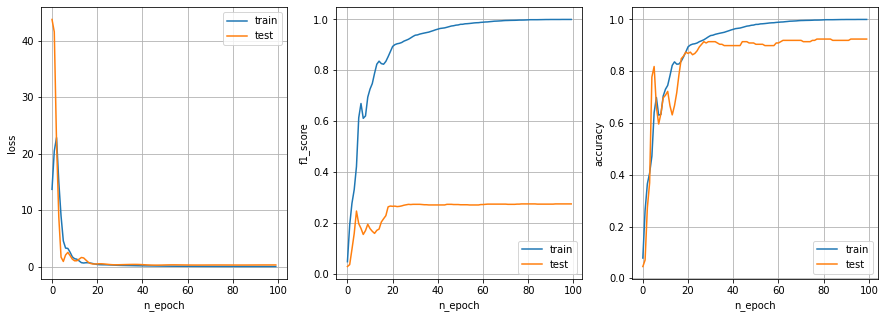

In [82]:
set_sizes(100, 100, 20, 0)

##**50%**

Epoch [100/100], loss: 0.012383214198052883. f1:0.9991665268511751 acc: 0.9991666674613953 


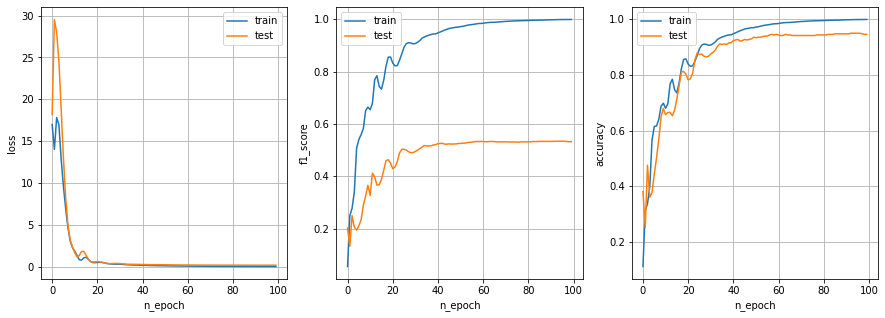

In [83]:
set_sizes(100, 100, 50, 0)

##**80%**

Epoch [100/100], loss: 0.006314322352409363. f1:1.0 acc: 1.0 


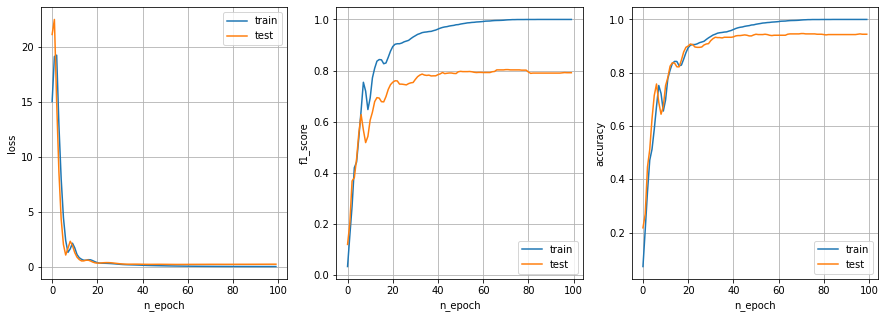

In [84]:
set_sizes(100, 100, 80, 0)

##**100%**

Epoch [100/100], loss: 0.009472659789025784. f1:1.0 acc: 1.0 


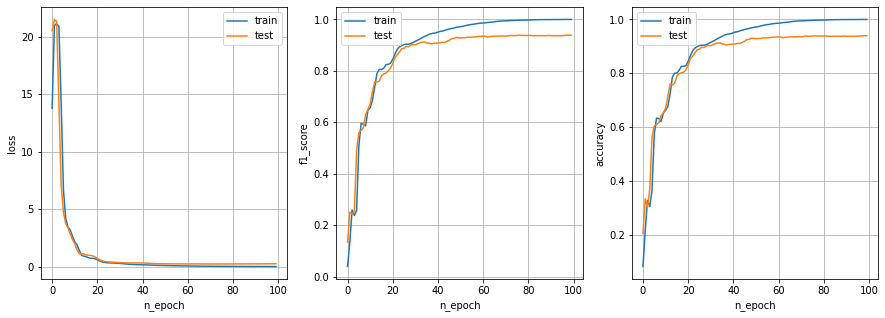

In [85]:
set_sizes(100, 100, 100, 0)

#En conclusion
El tamaño del set de testeo no tiene más importancia que para tener mayor claridad sobre la habilidad del pues con un mayor numero de datos de testeo se evitan la fluctuaciones en las curvas.
Los score obtenidos muestran igual tendencia en todos los casos salvo algunas fluctuaciones.
El modelo aprende igual, pero al analizarlo utilizarlo lo que tendremos son porcentajes de acierto y por tanto si queremos garantizar cosas debemos hacerlo sobre un gran numero. 